In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import folium
from folium import Circle
from geopy import Nominatim

from sklearn.preprocessing import MinMaxScaler
from IPython.display import display 



from warnings import filterwarnings
filterwarnings('ignore')

plt.rcParams['figure.figsize'] = (8,4)
plt.style.use('fivethirtyeight')

In [2]:
pd.set_option('display.max_rows',500)
pd.set_option('display.max_columns',500)

In [3]:
df = pd.read_csv('Dataset/cost-of-living.csv')

In [4]:
# columns = 'SNo	Saint Petersburg, Russia	Istanbul, Turkey	Izmir, Turkey	Helsinki, Finland	Chisinau, Moldova	Milan, Italy	Cairo, Egypt	Banja Luka, Bosnia And Herzegovina	Baku, Azerbaijan	Guadalajara, Mexico	Kathmandu, Nepal	Hanoi, Vietnam	Ho Chi Minh City, Vietnam	Mexico City, Mexico	Rome, Italy	Monterrey, Mexico	Yekaterinburg, Russia	Sarajevo, Bosnia And Herzegovina	Kharkiv, Ukraine	Kiev, Ukraine	Calgary, Canada	Tunis, Tunisia	Edmonton, Canada	Amsterdam, Netherlands	Belgrade, Serbia	Odessa, Ukraine	Paris, France	Eindhoven, Netherlands	Plovdiv, Bulgaria	Thessaloniki, Greece	Ottawa, Canada	Sofia, Bulgaria	Rotterdam, Netherlands	Varna, Bulgaria	Novi Sad, Serbia	Utrecht, Netherlands	Berlin, Germany	Beirut, Lebanon	Austin, TX, United States	Singapore, Singapore	Toronto, Canada	Auckland, New Zealand	Podgorica, Montenegro	Vancouver, Canada	Tokyo, Japan	Victoria, Canada	Winnipeg, Canada	Boston, MA, United States	Chicago, IL, United States	Almaty, Kazakhstan	Oslo, Norway	Frankfurt, Germany	Bratislava, Slovakia	Dallas, TX, United States	Zagreb, Croatia	Hamburg, Germany	Krakow (Cracow), Poland	Riga, Latvia	Gdansk, Poland	Santiago, Chile	Nairobi, Kenya	Abu Dhabi, United Arab Emirates	Houston, TX, United States	Tbilisi, Georgia	Dubai, United Arab Emirates	Bogota, Colombia	Brno, Czech Republic	Munich, Germany	Poznan, Poland	Las Vegas, NV, United States	London, United Kingdom	Los Angeles, CA, United States	Panama City, Panama	Seoul, South Korea	Warsaw, Poland	Prague, Czech Republic	Wroclaw, Poland	Kuala Lumpur, Malaysia	New York, NY, United States	Copenhagen, Denmark	Ljubljana, Slovenia	Chandigarh, India	Colombo, Sri Lanka	Noida, India	Kaunas, Lithuania	Athens, Greece	Phoenix, AZ, United States	Hong Kong, Hong Kong	Portland, OR, United States	Lisbon, Portugal	Beijing, China	Cape Town, South Africa	Tirana, Albania	Porto, Portugal	Durban, South Africa	Budapest, Hungary	Vilnius, Lithuania	Johannesburg, South Africa	Barcelona, Spain	San Diego, CA, United States	San Francisco, CA, United States	Lima, Peru	Seattle, WA, United States	Brasov, Romania	Bucharest, Romania	Tashkent, Uzbekistan	Ahmedabad, India	Cluj-Napoca, Romania	Madrid, Spain	Tallinn, Estonia	Bangalore, India	Iasi, Romania	Chennai, India	Doha, Qatar	Delhi, India	Gurgaon, India	Valencia, Spain	Vienna, Austria	Hyderabad, India	Montevideo, Uruguay	Tel Aviv-Yafo, Israel	Timisoara, Romania	Taipei, Taiwan	Kolkata, India	Skopje, Macedonia	Shanghai, China	Bangkok, Thailand	Mumbai, India	Reykjavik, Iceland	Amman, Jordan	Pune, India	Stockholm, Sweden	Buenos Aires, Argentina	Minsk, Belarus	San Jose, Costa Rica	Casablanca, Morocco	Lodz, Poland	Montreal, Canada	Sao Paulo, Brazil	Gothenburg, Sweden	Dublin, Ireland	Moscow, Russia	Santo Domingo, Dominican Republic	Adelaide, Australia	Zurich, Switzerland	Yerevan, Armenia	Manila, Philippines	Brisbane, Australia	Jakarta, Indonesia	Ankara, Turkey	Lviv, Ukraine	Novosibirsk, Russia	Bursa, Turkey	Brussels, Belgium	Jerusalem, Israel	Melbourne, Australia	Perth, Australia	Sydney, Australia	Alexandria, Egypt	Quito, Ecuador'.split('\t')

In [5]:
# df1.columns = columns

In [6]:
df.head()

,Unnamed: 0,"Saint Petersburg, Russia","Istanbul, Turkey","Izmir, Turkey","Helsinki, Finland","Chisinau, Moldova","Milan, Italy","Cairo, Egypt","Banja Luka, Bosnia And Herzegovina","Baku, Azerbaijan","Guadalajara, Mexico","Kathmandu, Nepal","Hanoi, Vietnam","Ho Chi Minh City, Vietnam","Mexico City, Mexico","Rome, Italy","Monterrey, Mexico","Yekaterinburg, Russia","Sarajevo, Bosnia And Herzegovina","Kharkiv, Ukraine","Kiev, Ukraine","Calgary, Canada","Tunis, Tunisia","Edmonton, Canada","Amsterdam, Netherlands","Belgrade, Serbia","Odessa, Ukraine","Paris, France","Eindhoven, Netherlands","Plovdiv, Bulgaria","Thessaloniki, Greece","Ottawa, Canada","Sofia, Bulgaria","Rotterdam, Netherlands","Varna, Bulgaria","Novi Sad, Serbia","Utrecht, Netherlands","Berlin, Germany","Beirut, Lebanon","Austin, TX, United States","Singapore, Singapore","Toronto, Canada","Auckland, New Zealand","Podgorica, Montenegro","Vancouver, Canada","Tokyo, Japan","Victoria, Canada","Winnipeg, Canada","Boston, MA, United States","Chicago, IL, United States","Almaty, Kazakhstan","Oslo, Norway","Frankfurt, Germany","Bratislava, Slovakia","Dallas, TX, United States","Zagreb, Croatia","Hamburg, Germany","Krakow (Cracow), Poland","Riga, Latvia","Gdansk, Poland","Santiago, Chile","Nairobi, Kenya","Abu Dhabi, United Arab Emirates","Houston, TX, United States","Tbilisi, Georgia","Dubai, United Arab Emirates","Bogota, Colombia","Brno, Czech Republic","Munich, Germany","Poznan, Poland","Las Vegas, NV, United States","London, United Kingdom","Los Angeles, CA, United States","Panama City, Panama","Seoul, South Korea","Warsaw, Poland","Prague, Czech Republic","Wroclaw, Poland","Kuala Lumpur, Malaysia","New York, NY, United States","Copenhagen, Denmark","Ljubljana, Slovenia","Chandigarh, India","Colombo, Sri Lanka","Noida, India","Kaunas, Lithuania","Athens, Greece","Phoenix, AZ, United States","Hong Kong, Hong Kong","Portland, OR, United States","Lisbon, Portugal","Beijing, China","Cape Town, South Africa","Tirana, Albania","Porto, Portugal","Durban, South Africa","Budapest, Hungary","Vilnius, Lithuania","Johannesburg, South Africa","Barcelona, Spain","San Diego, CA, United States","San Francisco, CA, United States","Lima, Peru","Seattle, WA, United States","Brasov, Romania","Bucharest, Romania","Tashkent, Uzbekistan","Ahmedabad, India","Cluj-Napoca, Romania","Madrid, Spain","Tallinn, Estonia","Bangalore, India","Iasi, Romania","Chennai, India","Doha, Qatar","Delhi, India","Gurgaon, India","Valencia, Spain","Vienna, Austria","Hyderabad, India","Montevideo, Uruguay","Tel Aviv-Yafo, Israel","Timisoara, Romania","Taipei, Taiwan","Kolkata, India","Skopje, Macedonia","Shanghai, China","Bangkok, Thailand","Mumbai, India","Reykjavik, Iceland","Amman, Jordan","Pune, India","Stockholm, Sweden","Buenos Aires, Argentina","Minsk, Belarus","San Jose, Costa Rica","Casablanca, Morocco","Lodz, Poland","Montreal, Canada","Sao Paulo, Brazil","Gothenburg, Sweden","Dublin, Ireland","Moscow, Russia","Santo Domingo, Dominican Republic","Adelaide, Australia","Zurich, Switzerland","Yerevan, Armenia","Manila, Philippines","Brisbane, Australia","Jakarta, Indonesia","Ankara, Turkey","Lviv, Ukraine","Novosibirsk, Russia","Bursa, Turkey","Brussels, Belgium","Jerusalem, Israel","Melbourne, Australia","Perth, Australia","Sydney, Australia","Alexandria, Egypt","Quito, Ecuador"
0,"Meal, Inexpensive Restaurant",7.34,4.58,3.06,12.00,4.67,15.0,3.38,3.58,5.27,5.25,1.99,1.94,1.94,4.77,15.0,5.75,5.88,3.57,4.50,5.63,13.75,1.92,13.75,15.0,5.39,5.65,15.0,15.0,5.10,10.0,11.00,6.14,13.0,6.12,4.84,15.0,8.5,8.98,13.48,8.33,13.75,11.95,5.0,11.69,8.19,12.05,10.31,13.47,13.47,4.77,18.70,10.0,6.0,13.48,6.72,11.0,5.91,7.0,5.91,6.94,4.43,6.12,13.48,4.67,7.33,3.30,5.95,12.0,5.90,13.47,17.49,13.47,8.98,6.42,5.91,5.95,5.91,2.87,17.97,17.40,8.0,2.54,1.49,3.80,6.0,10.0,10.77,5.78,12.58,8.5,3.91,8.91,4.10,7.0,7.47,5.99,7.0,8.47,11.0,13.48,15.95,3.26,13.48,6.27,6.28,3.59,1.90,5.23,12.0,8.0,2.53,5.23,1.52,6.18,3.80,3.80,8.75,10.00,1

In [7]:
locator = Nominatim(user_agent='http')
location = locator.geocode('Saint Petersburg, Russia')

In [8]:
print(f"Saint Petersburg, Russia's longitude: {location.longitude} and latitude: {location.latitude}")

Saint Petersburg, Russia's longitude: 30.1586551 and latitude: 59.9606739


In [9]:
city = df.T
city.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54
Unnamed: 0,"Meal, Inexpensive Restaurant","Meal for 2 People, Mid-range Restaurant, Three...",McMeal at McDonalds (or Equivalent Combo Meal),Domestic Beer (0.5 liter draught),Imported Beer (0.33 liter bottle),Coke/Pepsi (0.33 liter bottle),Water (0.33 liter bottle),"Milk (regular), (1 liter)",Loaf of Fresh White Bread (500g),Eggs (regular) (12),Local Cheese (1kg),Water (1.5 liter bottle),Bottle of Wine (Mid-Range),Domestic Beer (0.5 liter bottle),Imported Beer (0.33 liter bottle),Cigarettes 20 Pack (Marlboro),One-way Ticket (Local Transport),"Chicken Breasts (Boneless, Skinless), (1kg)",Monthly Pass (Regular Price),Gasoline (1 liter),Volkswagen Golf,Apartment (1 bedroom) in City Centre,Apartment (1 bedroom) Outside of Centre,Apartment (3 bedrooms) in City Centre,Apartment (3 bedrooms) Outside of Centre,"Basic (Electricity, Heating, Cooling, Water, G...",1 min. of Prepaid Mobile Tariff Local (No Disc...,"Internet (60 Mbps or More, Unlimited Data, Cab...","Fitness Club, Monthly Fee for 1 Adult",Tennis Court Rent (1 Hour on Weekend),"Cinema, International Release, 1 Seat",1 Pair of Jeans (Levis 501 Or Similar),"1 Summer Dress in a Chain Store (Zara, H&M, ...)",1 Pair of Nike Running Shoes (Mid-Range),1 Pair of Men Leather Business Shoes,Price per Square Meter to Buy Apartment in Cit...,Price per Square Meter to Buy Apartment Outsid...,Average Monthly Net Salary (After Tax),"Mortgage Interest Rate in Percentages (%), Yea...",Taxi Start (Normal Tariff),Taxi 1km (Normal Tariff),Taxi 1hour Waiting (Normal Tariff),Apples (1kg),Oranges (1kg),Potato (1kg),Lettuce (1 head),Cappuccino (regular),"Rice (white), (1kg)",Tomato (1kg),Banana (1kg),Onion (1kg),Beef Round (1kg) (or Equivalent Back Leg Red M...,Toyota Corolla 1.6l 97kW Comfort (Or Equivalen...,"Preschool (or Kindergarten), Full Day, Private...","International Primary School, Yearly for 1 Child"
"Saint Petersburg, Russia",7.34,29.35,4.4,2.2,2.2,0.76,0.53,0.98,0.71,1.18,7.6,0.63,5.87,0.88,1.89,2.2,0.59,3.96,42.56,0.67,19289.39,524.45,344.27,1012.53,615.19,102.17,0.03,6.96,26.27,18.33,5.14,71.86,38.25,74.88,100.72,2476.05,1507.7,645.94,10.29,1.47,0.26,4.4,1.29,1.25,0.56,0.86,1.96,0.92,1.91,0.89,0.48,7.18,19305.29,411.83,5388.86
"Istanbul, Turkey",4.58,15.28,3.82,3.06,3.06,0.64,0.24,0.71,0.36,1.62,5.32,0.33,7.64,1.79,2.48,2.75,0.41,3.5,31.32,1.05,24443.15,291.55,177.72,545.5,314.98,59.33,0.11,14.2,25.1,15.66,3.82,36.15,25.91,61.31,50.58,1315.18,657.05,436.0,19.08,0.76,0.47,3.59,0.85,0.86,0.59,0.61,1.84,1.3,0.8,1.91,0.62,9.73,20874.72,282.94,6905.43
"Izmir, Turkey",3.06,12.22,3.06,2.29,2.75,0.61,0.22,0.65,0.38,1.51,4.97,0.29,6.11,1.63,2.09,2.29,0.46,3.05,22.92,1.04,24443.15,212.22,128.36,353.76,225.34,51.07,0.09,12.89,20.64,11.67,3.06,33.2,22.48,52.74,42.2,856.54,508.14,392.07,22.23,0.61,0.57,3.51,0.77,0.73,0.52,0.57,1.56,1.31,0.7,1.78,0.58,8.61,20898.83,212.18,4948.41
"Helsinki, Finland",12.0,65.0,8.0,6.5,6.75,2.66,1.89,0.96,2.27,2.02,6.87,1.54,12.0,2.23,2.95,7.7,2.8,9.42,59.7,1.54,22000.0,986.93,758.13,1819.32,1271.16,82.66,0.07,22.31,34.54,24.72,14.0,83.41,31.41,82.49,120.97,7444.54,4099.36,2382.56,1.38,6.0,1.0,47.04,2.1,1.75,0.91,2.3,3.87,2.13,2.91,1.61,1.25,12.34,24402.77,351.6,1641.0


In [10]:
columns = city.iloc[0]
city.rename(columns=columns,inplace=True)

In [11]:
city.drop(city.index[0],inplace=True)
city.head()

,"Meal, Inexpensive Restaurant","Meal for 2 People, Mid-range Restaurant, Three-course",McMeal at McDonalds (or Equivalent Combo Meal),Domestic Beer (0.5 liter draught),Imported Beer (0.33 liter bottle),Coke/Pepsi (0.33 liter bottle),Water (0.33 liter bottle),"Milk (regular), (1 liter)",Loaf of Fresh White Bread (500g),Eggs (regular) (12),Local Cheese (1kg),Water (1.5 liter bottle),Bottle of Wine (Mid-Range),Domestic Beer (0.5 liter bottle),Imported Beer (0.33 liter bottle),Cigarettes 20 Pack (Marlboro),One-way Ticket (Local Transport),"Chicken Breasts (Boneless, Skinless), (1kg)",Monthly Pass (Regular Price),Gasoline (1 liter),Volkswagen Golf,Apartment (1 bedroom) in City Centre,Apartment (1 bedroom) Outside of Centre,Apartment (3 bedrooms) in City Centre,Apartment (3 bedrooms) Outside of Centre,"Basic (Electricity, Heating, Cooling, Water, Garbage) for 85m2 Apartment",1 min. of Prepaid Mobile Tariff Local (No Discounts or Plans),"Internet (60 Mbps or More, Unlimited Data, Cable/ADSL)","Fitness Club, Monthly Fee for 1 Adult",Tennis Court Rent (1 Hour on Weekend),"Cinema, International Release, 1 Seat",1 Pair of Jeans (Levis 501 Or Similar),"1 Summer Dress in a Chain Store (Zara, H&M, ...)",1 Pair of Nike Running Shoes (Mid-Range),1 Pair of Men Leather Business Shoes,Price per Square Meter to Buy Apartment in City Centre,Price per Square Meter to Buy Apartment Outside of Centre,Average Monthly Net Salary (After Tax),"Mortgage Interest Rate in Percentages (%), Yearly, for 20 Years Fixed-Rate",Taxi Start (Normal Tariff),Taxi 1km (Normal Tariff),Taxi 1hour Waiting (Normal Tariff),Apples (1kg),Oranges (1kg),Potato (1kg),Lettuce (1 head),Cappuccino (regular),"Rice (white), (1kg)",Tomato (1kg),Banana (1kg),Onion (1kg),Beef Round (1kg) (or Equivalent Back Leg Red Meat),Toyota Corolla 1.6l 97kW Comfort (Or Equivalent New Car),"Preschool (or Kindergarten), Full Day, Private, Monthly for 1 Child","International Primary School, Yearly for 1 Child"
"Saint Petersburg, Russia",7.34,29.35,4.4,2.2,2.2,0.76,0.53,0.98,0.71,1.18,7.6,0.63,5.87,0.88,1.89,2.2,0.59,3.96,42.56,0.67,19289.39,524.45,344.27,1012.53,615.19,102.17,0.03,6.96,26.27,18.33,5.14,71.86,38.25,74.88,100.72,2476.05,1507.7,645.94,10.29,1.47,0.26,4.4,1.29,1.25,0.56,0.86,1.96,0.92,1.91,0.89,0.48,7.18,19305.29,411.83,5388.86
"Istanbul, Turkey",4.58,15.28,3.82,3.06,3.06,0.64,0.24,0.71,0.36,1.62,5.32,0.33,7.64,1.79,2.48,2.75,0.41,3.5,31.32,1.05,24443.15,291.55,177.72,545.5,314.98,59.33,0.11,14.2,25.1,15.66,3.82,36.15,25.91,61.31,50.58,1315.18,657.05,436.0,19.08,0.76,0.47,3.59,0.85,0.86,0.59,0.61,1.84,1.3,0.8,1.91,0.62,9.73,20874.72,282.94,6905.43
"Izmir, Turkey",3.06,12.22,3.06,2.29,2.75,0.61,0.22,0.65,0.38,1.51,4.97,0.29,6.11,1.63,2.09,2.29,0.46,3.05,22.92,1.04,24443.15,212.22,128.36,353.76,225.34,51.07,0.09,12.89,20.64,11.67,3.06,33.2,22.48,52.74,42.2,856.54,508.14,392.07,22.23,0.61,0.57,3.51,0.77,0.73,0.52,0.57,1.56,1.31,0.7,1.78,0.58,8.61,20898.83,212.18,4948.41
"Helsinki, Finland",12.0,65.0,8.0,6.5,6.75,2.66,1.89,0.96,2.27,2.02,6.87,1.54,12.0,2.23,2.95,7.7,2.8,9.42,59.7,1.54,22000.0,986.93,758.13,1819.32,1271.16,82.66,0.07,22.31,34.54,24.72,14.0,83.41,31.41,82.49,120.97,7444.54,4099.36,2382.56,1.38,6.0,1.0,47.04,2.1,1.75,0.91,2.3,3.87,2.13,2.91,1.61,1.25,12.34,24402.77,351.6,1641.0
"Chisinau, Moldova",4.67,20.74,4.15,1.04,1.43,0.64,0.44,0.68,0.33,1.11,5.79,0.59,3.61,0.77,1.38,1.56,0.1,3.55,9.33,0.98,16335.12,244.49,177.96,428.67,330.84,113.46,0.07,8.58,26.64,12.1,5.19,56.54,35.37,86.25,94.38,904.82,589.13,286.95,9.42,1.3,0.18,3.11,0.7,1.22,0.56,0.84,1.25,0.93,1.56,1.37,0.59,5.37,17238.13,210.52,2679.3


In [12]:
city = city.reset_index().rename(columns={'index':'location'})
city.head()

,location,"Meal, Inexpensive Restaurant","Meal for 2 People, Mid-range Restaurant, Three-course",McMeal at McDonalds (or Equivalent Combo Meal),Domestic Beer (0.5 liter draught),Imported Beer (0.33 liter bottle),Coke/Pepsi (0.33 liter bottle),Water (0.33 liter bottle),"Milk (regular), (1 liter)",Loaf of Fresh White Bread (500g),Eggs (regular) (12),Local Cheese (1kg),Water (1.5 liter bottle),Bottle of Wine (Mid-Range),Domestic Beer (0.5 liter bottle),Imported Beer (0.33 liter bottle),Cigarettes 20 Pack (Marlboro),One-way Ticket (Local Transport),"Chicken Breasts (Boneless, Skinless), (1kg)",Monthly Pass (Regular Price),Gasoline (1 liter),Volkswagen Golf,Apartment (1 bedroom) in City Centre,Apartment (1 bedroom) Outside of Centre,Apartment (3 bedrooms) in City Centre,Apartment (3 bedrooms) Outside of Centre,"Basic (Electricity, Heating, Cooling, Water, Garbage) for 85m2 Apartment",1 min. of Prepaid Mobile Tariff Local (No Discounts or Plans),"Internet (60 Mbps or More, Unlimited Data, Cable/ADSL)","Fitness Club, Monthly Fee for 1 Adult",Tennis Court Rent (1 Hour on Weekend),"Cinema, International Release, 1 Seat",1 Pair of Jeans (Levis 501 Or Similar),"1 Summer Dress in a Chain Store (Zara, H&M, ...)",1 Pair of Nike Running Shoes (Mid-Range),1 Pair of Men Leather Business Shoes,Price per Square Meter to Buy Apartment in City Centre,Price per Square Meter to Buy Apartment Outside of Centre,Average Monthly Net Salary (After Tax),"Mortgage Interest Rate in Percentages (%), Yearly, for 20 Years Fixed-Rate",Taxi Start (Normal Tariff),Taxi 1km (Normal Tariff),Taxi 1hour Waiting (Normal Tariff),Apples (1kg),Oranges (1kg),Potato (1kg),Lettuce (1 head),Cappuccino (regular),"Rice (white), (1kg)",Tomato (1kg),Banana (1kg),Onion (1kg),Beef Round (1kg) (or Equivalent Back Leg Red Meat),Toyota Corolla 1.6l 97kW Comfort (Or Equivalent New Car),"Preschool (or Kindergarten), Full Day, Private, Monthly for 1 Child","International Primary School, Yearly for 1 Child"
0,"Saint Petersburg, Russia",7.34,29.35,4.4,2.2,2.2,0.76,0.53,0.98,0.71,1.18,7.6,0.63,5.87,0.88,1.89,2.2,0.59,3.96,42.56,0.67,19289.39,524.45,344.27,1012.53,615.19,102.17,0.03,6.96,26.27,18.33,5.14,71.86,38.25,74.88,100.72,2476.05,1507.7,645.94,10.29,1.47,0.26,4.4,1.29,1.25,0.56,0.86,1.96,0.92,1.91,0.89,0.48,7.18,19305.29,411.83,5388.86
1,"Istanbul, Turkey",4.58,15.28,3.82,3.06,3.06,0.64,0.24,0.71,0.36,1.62,5.32,0.33,7.64,1.79,2.48,2.75,0.41,3.5,31.32,1.05,24443.15,291.55,177.72,545.5,314.98,59.33,0.11,14.2,25.1,15.66,3.82,36.15,25.91,61.31,50.58,1315.18,657.05,436.0,19.08,0.76,0.47,3.59,0.85,0.86,0.59,0.61,1.84,1.3,0.8,1.91,0.62,9.73,20874.72,282.94,6905.43
2,"Izmir, Turkey",3.06,12.22,3.06,2.29,2.75,0.61,0.22,0.65,0.38,1.51,4.97,0.29,6.11,1.63,2.09,2.29,0.46,3.05,22.92,1.04,24443.15,212.22,128.36,353.76,225.34,51.07,0.09,12.89,20.64,11.67,3.06,33.2,22.48,52.74,42.2,856.54,508.14,392.07,22.23,0.61,0.57,3.51,0.77,0.73,0.52,0.57,1.56,1.31,0.7,1.78,0.58,8.61,20898.83,212.18,4948.41
3,"Helsinki, Finland",12.0,65.0,8.0,6.5,6.75,2.66,1.89,0.96,2.27,2.02,6.87,1.54,12.0,2.23,2.95,7.7,2.8,9.42,59.7,1.54,22000.0,986.93,758.13,1819.32,1271.16,82.66,0.07,22.31,34.54,24.72,14.0,83.41,31.41,82.49,120.97,7444.54,4099.36,2382.56,1.38,6.0,1.0,47.04,2.1,1.75,0.91,2.3,3.87,2.13,2.91,1.61,1.25,12.34,24402.77,351.6,1641.0
4,"Chisinau, Moldova",4.67,20.74,4.15,1.04,1.43,0.64,0.44,0.68,0.33,1.11,5.79,0.59,3.61,0.77,1.38,1.56,0.1,3.55,9.33,0.98,16335.12,244.49,177.96,428.67,330.84,113.46,0.07,8.58,26.64,12.1,5.19,56.54,35.37,86.25,94.38,904.82,589.13,286.95,9.42,1.3,0.18,3.11,0.7,1.22,0.56,0.84,1.25,0.93,1.56,1.37,0.59,5.37,17238.13,210.52,2679.3


In [13]:
location = city.location.apply(lambda x: locator.geocode(x))

In [14]:
latitude = [location[i].latitude for i in range(len(location))]
longitude = [location[i].longitude for i in range(len(location))]

In [15]:
city['latitude'] = latitude
city['longitude'] = longitude

In [16]:
city.head()

,location,"Meal, Inexpensive Restaurant","Meal for 2 People, Mid-range Restaurant, Three-course",McMeal at McDonalds (or Equivalent Combo Meal),Domestic Beer (0.5 liter draught),Imported Beer (0.33 liter bottle),Coke/Pepsi (0.33 liter bottle),Water (0.33 liter bottle),"Milk (regular), (1 liter)",Loaf of Fresh White Bread (500g),Eggs (regular) (12),Local Cheese (1kg),Water (1.5 liter bottle),Bottle of Wine (Mid-Range),Domestic Beer (0.5 liter bottle),Imported Beer (0.33 liter bottle),Cigarettes 20 Pack (Marlboro),One-way Ticket (Local Transport),"Chicken Breasts (Boneless, Skinless), (1kg)",Monthly Pass (Regular Price),Gasoline (1 liter),Volkswagen Golf,Apartment (1 bedroom) in City Centre,Apartment (1 bedroom) Outside of Centre,Apartment (3 bedrooms) in City Centre,Apartment (3 bedrooms) Outside of Centre,"Basic (Electricity, Heating, Cooling, Water, Garbage) for 85m2 Apartment",1 min. of Prepaid Mobile Tariff Local (No Discounts or Plans),"Internet (60 Mbps or More, Unlimited Data, Cable/ADSL)","Fitness Club, Monthly Fee for 1 Adult",Tennis Court Rent (1 Hour on Weekend),"Cinema, International Release, 1 Seat",1 Pair of Jeans (Levis 501 Or Similar),"1 Summer Dress in a Chain Store (Zara, H&M, ...)",1 Pair of Nike Running Shoes (Mid-Range),1 Pair of Men Leather Business Shoes,Price per Square Meter to Buy Apartment in City Centre,Price per Square Meter to Buy Apartment Outside of Centre,Average Monthly Net Salary (After Tax),"Mortgage Interest Rate in Percentages (%), Yearly, for 20 Years Fixed-Rate",Taxi Start (Normal Tariff),Taxi 1km (Normal Tariff),Taxi 1hour Waiting (Normal Tariff),Apples (1kg),Oranges (1kg),Potato (1kg),Lettuce (1 head),Cappuccino (regular),"Rice (white), (1kg)",Tomato (1kg),Banana (1kg),Onion (1kg),Beef Round (1kg) (or Equivalent Back Leg Red Meat),Toyota Corolla 1.6l 97kW Comfort (Or Equivalent New Car),"Preschool (or Kindergarten), Full Day, Private, Monthly for 1 Child","International Primary School, Yearly for 1 Child",latitude,longitude
0,"Saint Petersburg, Russia",7.34,29.35,4.4,2.2,2.2,0.76,0.53,0.98,0.71,1.18,7.6,0.63,5.87,0.88,1.89,2.2,0.59,3.96,42.56,0.67,19289.39,524.45,344.27,1012.53,615.19,102.17,0.03,6.96,26.27,18.33,5.14,71.86,38.25,74.88,100.72,2476.05,1507.7,645.94,10.29,1.47,0.26,4.4,1.29,1.25,0.56,0.86,1.96,0.92,1.91,0.89,0.48,7.18,19305.29,411.83,5388.86,59.960674,30.158655
1,"Istanbul, Turkey",4.58,15.28,3.82,3.06,3.06,0.64,0.24,0.71,0.36,1.62,5.32,0.33,7.64,1.79,2.48,2.75,0.41,3.5,31.32,1.05,24443.15,291.55,177.72,545.5,314.98,59.33,0.11,14.2,25.1,15.66,3.82,36.15,25.91,61.31,50.58,1315.18,657.05,436.0,19.08,0.76,0.47,3.59,0.85,0.86,0.59,0.61,1.84,1.3,0.8,1.91,0.62,9.73,20874.72,282.94,6905.43,41.076602,29.052495
2,"Izmir, Turkey",3.06,12.22,3.06,2.29,2.75,0.61,0.22,0.65,0.38,1.51,4.97,0.29,6.11,1.63,2.09,2.29,0.46,3.05,22.92,1.04,24443.15,212.22,128.36,353.76,225.34,51.07,0.09,12.89,20.64,11.67,3.06,33.2,22.48,52.74,42.2,856.54,508.14,392.07,22.23,0.61,0.57,3.51,0.77,0.73,0.52,0.57,1.56,1.31,0.7,1.78,0.58,8.61,20898.83,212.18,4948.41,38.423743,27.142802
3,"Helsinki, Finland",12.0,65.0,8.0,6.5,6.75,2.66,1.89,0.96,2.27,2.02,6.87,1.54,12.0,2.23,2.95,7.7,2.8,9.42,59.7,1.54,22000.0,986.93,758.13,1819.32,1271.16,82.66,0.07,22.31,34.54,24.72,14.0,83.41,31.41,82.49,120.97,7444.54,4099.36,2382.56,1.38,6.0,1.0,47.04,2.1,1.75,0.91,2.3,3.87,2.13,2.91,1.61,1.25,12.34,24402.77,351.6,1641.0,60.167488,24.942747
4,"Chisinau, Moldova",4.67,20.74,4.15,1.04,1.43,0.64,0.44,0.68,0.33,1.11,5.79,0.59,3.61,0.77,1.38,1.56,0.1,3.55,9.33,0.98,16335.12,244.49,177.96,428.67,330.84,113.46,0.07,8.58,26.64,12.1,5.19,56.54,35.37,86.25,94.38,904.82,589.13,286.95,9.42,1.3,0.18,3.11,0.7,1.22,0.56,0.84,1.25,0.93,1.56,1.37,0.59,5.37,17238.13,210.52,2679.3,47.024512,28.832292


In [17]:
city.columns

Index(['location', 'Meal, Inexpensive Restaurant',
       'Meal for 2 People, Mid-range Restaurant, Three-course',
       'McMeal at McDonalds (or Equivalent Combo Meal)',
       'Domestic Beer (0.5 liter draught)',
       'Imported Beer (0.33 liter bottle)', 'Coke/Pepsi (0.33 liter bottle)',
       'Water (0.33 liter bottle) ', 'Milk (regular), (1 liter)',
       'Loaf of Fresh White Bread (500g)', 'Eggs (regular) (12)',
       'Local Cheese (1kg)', 'Water (1.5 liter bottle)',
       'Bottle of Wine (Mid-Range)', 'Domestic Beer (0.5 liter bottle)',
       'Imported Beer (0.33 liter bottle)', 'Cigarettes 20 Pack (Marlboro)',
       'One-way Ticket (Local Transport)',
       'Chicken Breasts (Boneless, Skinless), (1kg)',
       'Monthly Pass (Regular Price)', 'Gasoline (1 liter)', 'Volkswagen Golf',
       'Apartment (1 bedroom) in City Centre',
       'Apartment (1 bedroom) Outside of Centre',
       'Apartment (3 bedrooms) in City Centre',
       'Apartment (3 bedrooms) Outside of Cen

In [18]:
def food(city):
    return int(round((city[['Meal, Inexpensive Restaurant',
       'Domestic Beer (0.5 liter draught)',
       'Imported Beer (0.33 liter bottle)', 'Coke/Pepsi (0.33 liter bottle)',
       'Water (0.33 liter bottle) ', 'Milk (regular), (1 liter)',
       'Loaf of Fresh White Bread (500g)', 'Eggs (regular) (12)',
       'Local Cheese (1kg)', 'Water (1.5 liter bottle)',
       'Bottle of Wine (Mid-Range)', 'Domestic Beer (0.5 liter bottle)',
       'Imported Beer (0.33 liter bottle)', 'Cigarettes 20 Pack (Marlboro)',
       'Chicken Breasts (Boneless, Skinless), (1kg)', 'Apples (1kg)', 'Oranges (1kg)',
       'Potato (1kg)', 'Lettuce (1 head)', 'Cappuccino (regular)',
       'Rice (white), (1kg)', 'Tomato (1kg)', 'Banana (1kg)', 'Onion (1kg)',
       'Beef Round (1kg) (or Equivalent Back Leg Red Meat)',]].mean())))

In [19]:
def travel(city):
    return int(round((city[['One-way Ticket (Local Transport)',
                            'Monthly Pass (Regular Price)', 'Gasoline (1 liter)',  
                            'Taxi Start (Normal Tariff)', 'Taxi 1km (Normal Tariff)',
                            'Taxi 1hour Waiting (Normal Tariff)',]].mean())))

In [20]:
def living(city): 
    return int(round((city[['Volkswagen Golf', 
                    'Toyota Corolla 1.6l 97kW Comfort (Or Equivalent New Car)',
                    'Apartment (1 bedroom) in City Centre',
                    'Apartment (1 bedroom) Outside of Centre',
                    'Apartment (3 bedrooms) in City Centre',
                    'Apartment (3 bedrooms) Outside of Centre',
                    'Basic (Electricity, Heating, Cooling, Water, Garbage) for 85m2 Apartment',
                    'Price per Square Meter to Buy Apartment in City Centre',
                    'Price per Square Meter to Buy Apartment Outside of Centre',]].mean())))

In [21]:
def lifestyle(city):
    return int(round((city[['1 min. of Prepaid Mobile Tariff Local (No Discounts or Plans)',
       'Internet (60 Mbps or More, Unlimited Data, Cable/ADSL)',
       'Fitness Club, Monthly Fee for 1 Adult',
       'Tennis Court Rent (1 Hour on Weekend)',
       '1 Pair of Jeans (Levis 501 Or Similar)',
       '1 Summer Dress in a Chain Store (Zara, H&M, ...)',
       '1 Pair of Nike Running Shoes (Mid-Range)',
       '1 Pair of Men Leather Business Shoes',
       'Cinema, International Release, 1 Seat',
       'Meal for 2 People, Mid-range Restaurant, Three-course',
       'McMeal at McDonalds (or Equivalent Combo Meal)',]].mean())))

In [22]:
def income(city):
    return int(round((city[['Average Monthly Net Salary (After Tax)', 
    'Mortgage Interest Rate in Percentages (%), Yearly, for 20 Years Fixed-Rate',]].mean())))

In [23]:
def education(city):
    return int(round((city[['Preschool (or Kindergarten), Full Day, Private, Monthly for 1 Child',
           'International Primary School, Yearly for 1 Child',]].mean())))

In [24]:
city['Food'],city['Travel'],city['Living'],city['Lifestyle'],city['Education'],city['Income'] = city.apply(food,axis=1), city.apply(travel,axis=1), city.apply(living,axis=1),city.apply(lifestyle,axis=1), city.apply(education,axis=1),city.apply(income,axis=1)

In [25]:
city.head()

,location,"Meal, Inexpensive Restaurant","Meal for 2 People, Mid-range Restaurant, Three-course",McMeal at McDonalds (or Equivalent Combo Meal),Domestic Beer (0.5 liter draught),Imported Beer (0.33 liter bottle),Coke/Pepsi (0.33 liter bottle),Water (0.33 liter bottle),"Milk (regular), (1 liter)",Loaf of Fresh White Bread (500g),Eggs (regular) (12),Local Cheese (1kg),Water (1.5 liter bottle),Bottle of Wine (Mid-Range),Domestic Beer (0.5 liter bottle),Imported Beer (0.33 liter bottle),Cigarettes 20 Pack (Marlboro),One-way Ticket (Local Transport),"Chicken Breasts (Boneless, Skinless), (1kg)",Monthly Pass (Regular Price),Gasoline (1 liter),Volkswagen Golf,Apartment (1 bedroom) in City Centre,Apartment (1 bedroom) Outside of Centre,Apartment (3 bedrooms) in City Centre,Apartment (3 bedrooms) Outside of Centre,"Basic (Electricity, Heating, Cooling, Water, Garbage) for 85m2 Apartment",1 min. of Prepaid Mobile Tariff Local (No Discounts or Plans),"Internet (60 Mbps or More, Unlimited Data, Cable/ADSL)","Fitness Club, Monthly Fee for 1 Adult",Tennis Court Rent (1 Hour on Weekend),"Cinema, International Release, 1 Seat",1 Pair of Jeans (Levis 501 Or Similar),"1 Summer Dress in a Chain Store (Zara, H&M, ...)",1 Pair of Nike Running Shoes (Mid-Range),1 Pair of Men Leather Business Shoes,Price per Square Meter to Buy Apartment in City Centre,Price per Square Meter to Buy Apartment Outside of Centre,Average Monthly Net Salary (After Tax),"Mortgage Interest Rate in Percentages (%), Yearly, for 20 Years Fixed-Rate",Taxi Start (Normal Tariff),Taxi 1km (Normal Tariff),Taxi 1hour Waiting (Normal Tariff),Apples (1kg),Oranges (1kg),Potato (1kg),Lettuce (1 head),Cappuccino (regular),"Rice (white), (1kg)",Tomato (1kg),Banana (1kg),Onion (1kg),Beef Round (1kg) (or Equivalent Back Leg Red Meat),Toyota Corolla 1.6l 97kW Comfort (Or Equivalent New Car),"Preschool (or Kindergarten), Full Day, Private, Monthly for 1 Child","International Primary School, Yearly for 1 Child",latitude,longitude,Food,Travel,Living,Lifestyle,Education,Income
0,"Saint Petersburg, Russia",7.34,29.35,4.4,2.2,2.2,0.76,0.53,0.98,0.71,1.18,7.6,0.63,5.87,0.88,1.89,2.2,0.59,3.96,42.56,0.67,19289.39,524.45,344.27,1012.53,615.19,102.17,0.03,6.96,26.27,18.33,5.14,71.86,38.25,74.88,100.72,2476.05,1507.7,645.94,10.29,1.47,0.26,4.4,1.29,1.25,0.56,0.86,1.96,0.92,1.91,0.89,0.48,7.18,19305.29,411.83,5388.86,59.960674,30.158655,2,8,5020,34,2900,328
1,"Istanbul, Turkey",4.58,15.28,3.82,3.06,3.06,0.64,0.24,0.71,0.36,1.62,5.32,0.33,7.64,1.79,2.48,2.75,0.41,3.5,31.32,1.05,24443.15,291.55,177.72,545.5,314.98,59.33,0.11,14.2,25.1,15.66,3.82,36.15,25.91,61.31,50.58,1315.18,657.05,436.0,19.08,0.76,0.47,3.59,0.85,0.86,0.59,0.61,1.84,1.3,0.8,1.91,0.62,9.73,20874.72,282.94,6905.43,41.076602,29.052495,2,6,5409,23,3594,228
2,"Izmir, Turkey",3.06,12.22,3.06,2.29,2.75,0.61,0.22,0.65,0.38,1.51,4.97,0.29,6.11,1.63,2.09,2.29,0.46,3.05,22.92,1.04,24443.15,212.22,128.36,353.76,225.34,51.07,0.09,12.89,20.64,11.67,3.06,33.2,22.48,52.74,42.2,856.54,508.14,392.07,22.23,0.61,0.57,3.51,0.77,0.73,0.52,0.57,1.56,1.31,0.7,1.78,0.58,8.61,20898.83,212.18,4948.41,38.423743,27.142802,2,5,5297,19,2580,207
3,"Helsinki, Finland",12.0,65.0,8.0,6.5,6.75,2.66,1.89,0.96,2.27,2.02,6.87,1.54,12.0,2.23,2.95,7.7,2.8,9.42,59.7,1.54,22000.0,986.93,758.13,1819.32,1271.16,82.66,0.07,22.31,34.54,24.72,14.0,83.41,31.41,82.49,120.97,7444.54,4099.36,2382.56,1.38,6.0,1.0,47.04,2.1,1.75,0.91,2.3,3.87,2.13,2.91,1.61,1.25,12.34,24402.77,351.6,1641.0,60.167488,24.942747,4,20,6985,44,996,1192
4,"Chisinau, Moldova",4.67,20.74,4.15,1.04,1.43,0.64,0.44,0.68,0.33,1.11,5.79,0.59,3.61,0.77,1.38,1.56,0.1,3.55,9.33,0.98,16335.12,244.49,177.96,428.67,330.84,113.46,0.07,8.58,26.64,12.1,5.19,56.54,35.37,86.25,94.38,904.82,589.13,286.95,9.42,1.3,0.18,3.11,0.7,1.22,0.56,0.84,1.25,0.93,1.56,1.37,0.59,5.37,17238.13,210.52,2679.3,47.024512,28.832292,2,2,4040,32,1445,148


In [26]:
city['Country'] = [city.location.str.split(', ')[i][1] for i in range(city.shape[0])]
city['City'] = [city.location.str.split(', ')[i][0] for i in range(city.shape[0])]

In [27]:
city.head()

,location,"Meal, Inexpensive Restaurant","Meal for 2 People, Mid-range Restaurant, Three-course",McMeal at McDonalds (or Equivalent Combo Meal),Domestic Beer (0.5 liter draught),Imported Beer (0.33 liter bottle),Coke/Pepsi (0.33 liter bottle),Water (0.33 liter bottle),"Milk (regular), (1 liter)",Loaf of Fresh White Bread (500g),Eggs (regular) (12),Local Cheese (1kg),Water (1.5 liter bottle),Bottle of Wine (Mid-Range),Domestic Beer (0.5 liter bottle),Imported Beer (0.33 liter bottle),Cigarettes 20 Pack (Marlboro),One-way Ticket (Local Transport),"Chicken Breasts (Boneless, Skinless), (1kg)",Monthly Pass (Regular Price),Gasoline (1 liter),Volkswagen Golf,Apartment (1 bedroom) in City Centre,Apartment (1 bedroom) Outside of Centre,Apartment (3 bedrooms) in City Centre,Apartment (3 bedrooms) Outside of Centre,"Basic (Electricity, Heating, Cooling, Water, Garbage) for 85m2 Apartment",1 min. of Prepaid Mobile Tariff Local (No Discounts or Plans),"Internet (60 Mbps or More, Unlimited Data, Cable/ADSL)","Fitness Club, Monthly Fee for 1 Adult",Tennis Court Rent (1 Hour on Weekend),"Cinema, International Release, 1 Seat",1 Pair of Jeans (Levis 501 Or Similar),"1 Summer Dress in a Chain Store (Zara, H&M, ...)",1 Pair of Nike Running Shoes (Mid-Range),1 Pair of Men Leather Business Shoes,Price per Square Meter to Buy Apartment in City Centre,Price per Square Meter to Buy Apartment Outside of Centre,Average Monthly Net Salary (After Tax),"Mortgage Interest Rate in Percentages (%), Yearly, for 20 Years Fixed-Rate",Taxi Start (Normal Tariff),Taxi 1km (Normal Tariff),Taxi 1hour Waiting (Normal Tariff),Apples (1kg),Oranges (1kg),Potato (1kg),Lettuce (1 head),Cappuccino (regular),"Rice (white), (1kg)",Tomato (1kg),Banana (1kg),Onion (1kg),Beef Round (1kg) (or Equivalent Back Leg Red Meat),Toyota Corolla 1.6l 97kW Comfort (Or Equivalent New Car),"Preschool (or Kindergarten), Full Day, Private, Monthly for 1 Child","International Primary School, Yearly for 1 Child",latitude,longitude,Food,Travel,Living,Lifestyle,Education,Income,Country,City
0,"Saint Petersburg, Russia",7.34,29.35,4.4,2.2,2.2,0.76,0.53,0.98,0.71,1.18,7.6,0.63,5.87,0.88,1.89,2.2,0.59,3.96,42.56,0.67,19289.39,524.45,344.27,1012.53,615.19,102.17,0.03,6.96,26.27,18.33,5.14,71.86,38.25,74.88,100.72,2476.05,1507.7,645.94,10.29,1.47,0.26,4.4,1.29,1.25,0.56,0.86,1.96,0.92,1.91,0.89,0.48,7.18,19305.29,411.83,5388.86,59.960674,30.158655,2,8,5020,34,2900,328,Russia,Saint Petersburg
1,"Istanbul, Turkey",4.58,15.28,3.82,3.06,3.06,0.64,0.24,0.71,0.36,1.62,5.32,0.33,7.64,1.79,2.48,2.75,0.41,3.5,31.32,1.05,24443.15,291.55,177.72,545.5,314.98,59.33,0.11,14.2,25.1,15.66,3.82,36.15,25.91,61.31,50.58,1315.18,657.05,436.0,19.08,0.76,0.47,3.59,0.85,0.86,0.59,0.61,1.84,1.3,0.8,1.91,0.62,9.73,20874.72,282.94,6905.43,41.076602,29.052495,2,6,5409,23,3594,228,Turkey,Istanbul
2,"Izmir, Turkey",3.06,12.22,3.06,2.29,2.75,0.61,0.22,0.65,0.38,1.51,4.97,0.29,6.11,1.63,2.09,2.29,0.46,3.05,22.92,1.04,24443.15,212.22,128.36,353.76,225.34,51.07,0.09,12.89,20.64,11.67,3.06,33.2,22.48,52.74,42.2,856.54,508.14,392.07,22.23,0.61,0.57,3.51,0.77,0.73,0.52,0.57,1.56,1.31,0.7,1.78,0.58,8.61,20898.83,212.18,4948.41,38.423743,27.142802,2,5,5297,19,2580,207,Turkey,Izmir
3,"Helsinki, Finland",12.0,65.0,8.0,6.5,6.75,2.66,1.89,0.96,2.27,2.02,6.87,1.54,12.0,2.23,2.95,7.7,2.8,9.42,59.7,1.54,22000.0,986.93,758.13,1819.32,1271.16,82.66,0.07,22.31,34.54,24.72,14.0,83.41,31.41,82.49,120.97,7444.54,4099.36,2382.56,1.38,6.0,1.0,47.04,2.1,1.75,0.91,2.3,3.87,2.13,2.91,1.61,1.25,12.34,24402.77,351.6,1641.0,60.167488,24.942747,4,20,6985,44,996,1192,Finland,Helsinki
4,"Chisinau, Moldova",4.67,20.74,4.15,1.04,1.43,0.64,0.44,0.68,0.33,1.11,5.79,0.59,3.61,0.77,1.38,1.56,0.1,3.55,9.33,0.98,16335.12,244.49,177.96,428.67,330.84,113.46,0.07,8.58,26.64,12.1,5.19,56.54,35.37,86.25,94.38,904.82,589.13,286.95,9.42,1.3,0.18,3.11,0.7,1.22,0.56,0.84,1.25,0.93,1.56,1.37,0.59,5.37,17238.13,210.52,2679.3,47.024512,28.832292,2,2,4040,32,1445,148,Moldova,Chisin

In [28]:
(
city[['Country','Food', 'Travel','Living','Lifestyle','Education','Income']]
.groupby(['Country'])
.agg('mean')
.style.background_gradient('Purples')
)

,Food,Travel,Living,Lifestyle,Education,Income
Country,,,,,,
AZ,4.000000,16.000000,5114.000000,35.000000,7088.000000,1559.000000
Albania,2.000000,5.000000,4157.000000,29.000000,1225.000000,171.000000
Argentina,2.000000,3.000000,4346.000000,28.000000,1638.000000,266.000000
Armenia,2.000000,3.000000,4390.000000,30.000000,1581.000000,154.000000
Australia,4.400000,21.600000,4932.200000,38.600000,5919.400000,1400.800000
Austria,4.000000,14.000000,6662.000000,40.000000,8124.000000,951.000000
Azerbaijan,2.000000,2.000000,4164.000000,32.000000,2933.000000,151.000000
Belarus,2.000000,3.000000,3932.000000,33.000000,2874.000000,224.000000
Belgium,4.000000,15.000000,5773.000000,42.000000,9519.000000,1146.000000


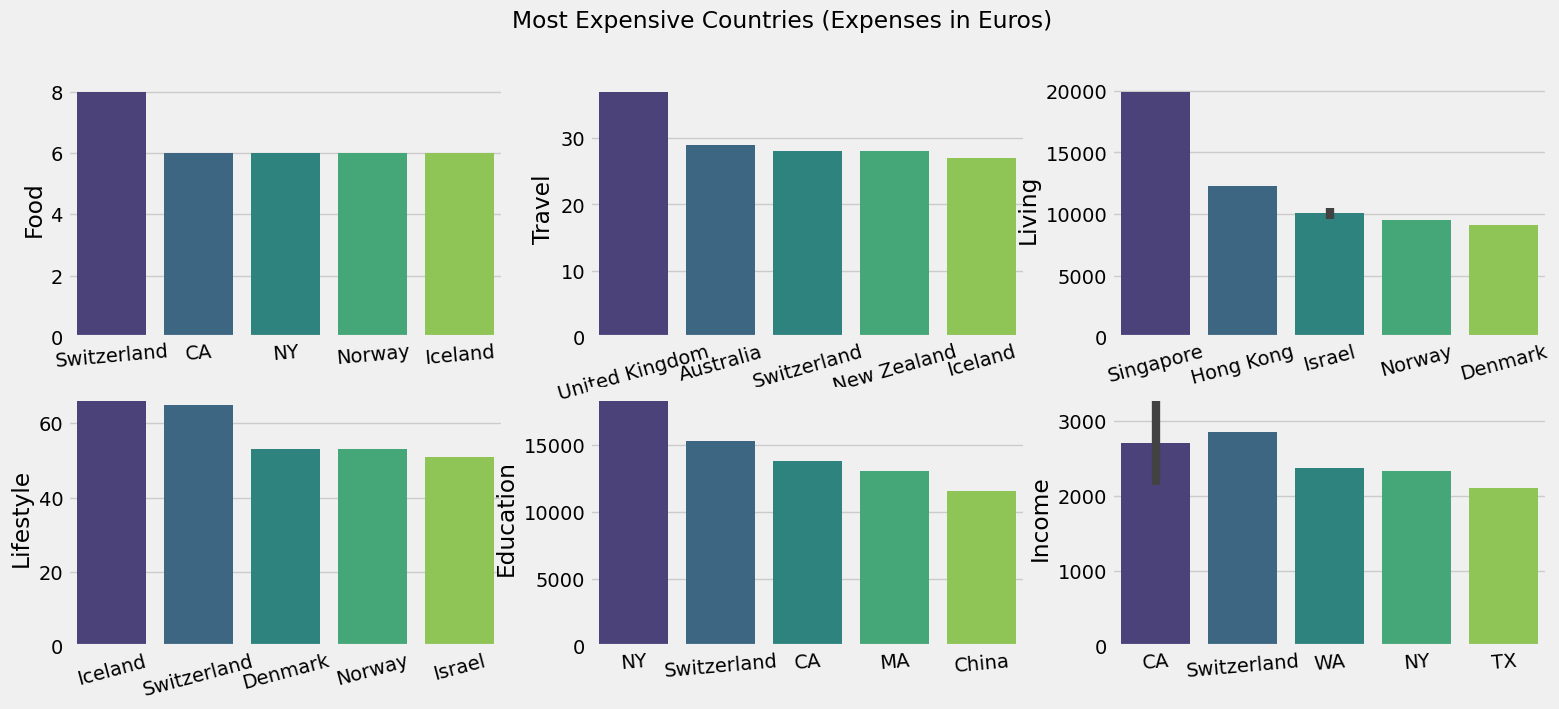

In [29]:
plt.figure(figsize=(17,7))
plt.subplot(2,3,1)
x = city[['Country','Food']].sort_values('Food',ascending=False).head(5)
sns.barplot(x=x.Country,y=x.Food,palette='viridis')
plt.xticks(rotation=5)
plt.xlabel('')

plt.subplot(2,3,2)
x = city[['Country','Travel']].sort_values('Travel',ascending=False).head(5)
sns.barplot(x=x.Country,y=x.Travel,palette='viridis')
plt.xticks(rotation=16)
plt.xlabel('')

plt.subplot(2,3,3)
x = city[['Country','Living']].sort_values('Living',ascending=False).head(6)
sns.barplot(x=x.Country,y=x.Living,palette='viridis')
plt.xticks(rotation=15)
plt.xlabel('')

plt.subplot(2,3,4)
x = city[['Country','Lifestyle']].sort_values('Lifestyle',ascending=False).head(5)
sns.barplot(x=x.Country,y=x.Lifestyle,palette='viridis')
plt.xticks(rotation=15)
plt.xlabel('')

plt.subplot(2,3,5)
x = city[['Country','Education']].sort_values('Education',ascending=False).head(5)
sns.barplot(x=x.Country,y=x.Education,palette='viridis')
plt.xticks(rotation=5)
plt.xlabel('')

plt.subplot(2,3,6)
x = city[['Country','Income']].sort_values('Income',ascending=False).head(6)
sns.barplot(x=x.Country,y=x.Income,palette='viridis')
plt.xticks(rotation=5)
plt.xlabel('')

plt.suptitle('Most Expensive Countries (Expenses in Euros)')
plt.show()

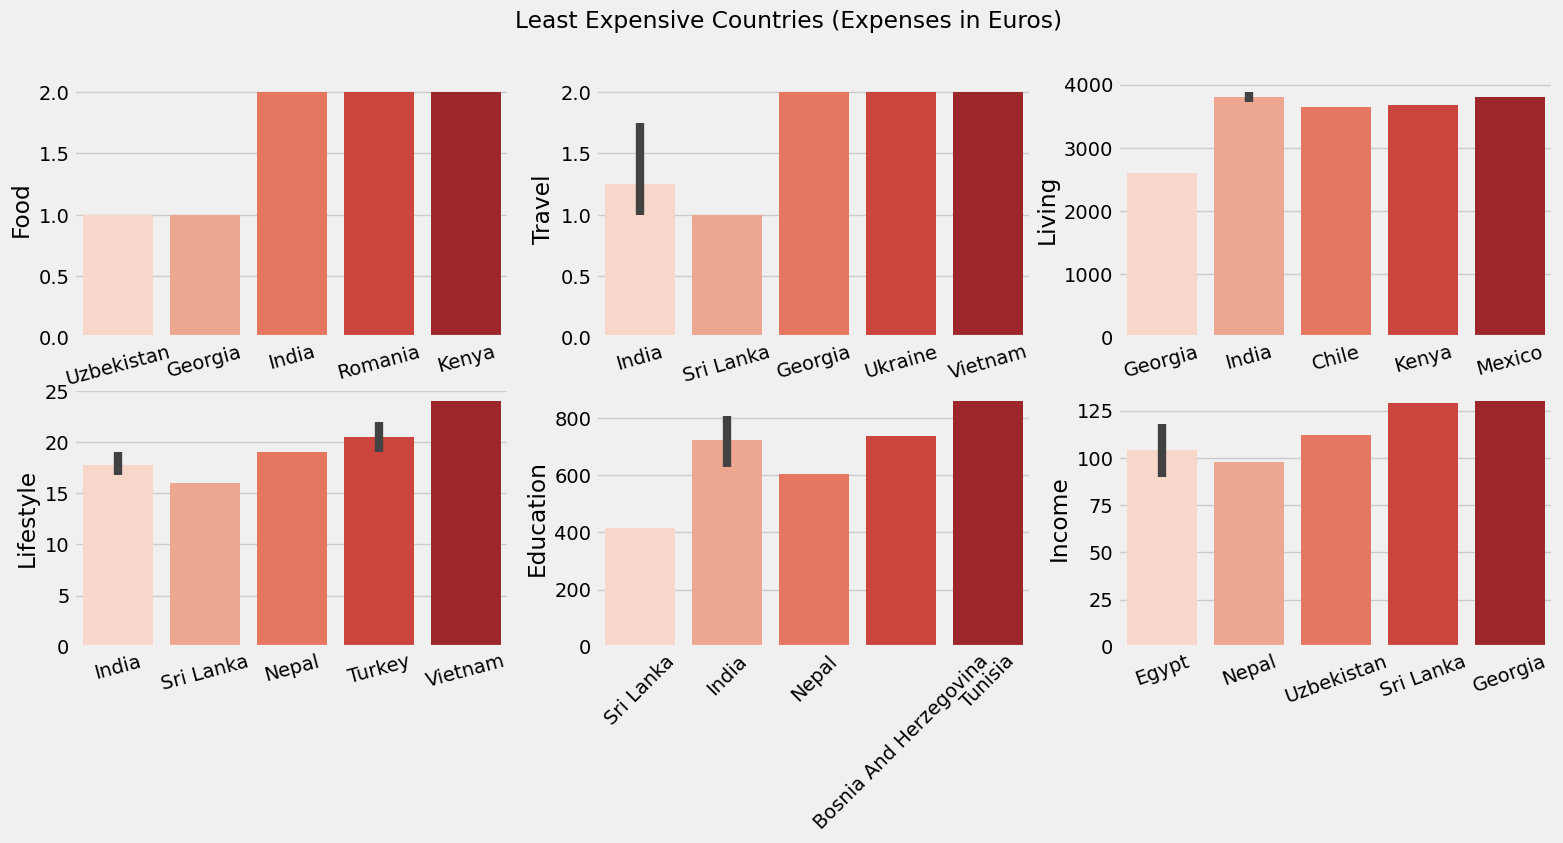

In [30]:
plt.figure(figsize=(17,7))
plt.subplot(2,3,1)
x = city[['Country','Food']].sort_values('Food',ascending=True).head(5)
sns.barplot(x=x.Country,y=x.Food,palette='Reds')
plt.xticks(rotation=15)
plt.xlabel('')

plt.subplot(2,3,2)
x = city[['Country','Travel']].sort_values('Travel',ascending=True).head(9)
sns.barplot(x=x.Country,y=x.Travel,palette='Reds')
plt.xticks(rotation=16)
plt.xlabel('')

plt.subplot(2,3,3)
x = city[['Country','Living']].sort_values('Living',ascending=True).head(10)
sns.barplot(x=x.Country,y=x.Living,palette='Reds')
plt.xticks(rotation=15)
plt.xlabel('')

plt.subplot(2,3,4)
x = city[['Country','Lifestyle']].sort_values('Lifestyle',ascending=True).head(18)
sns.barplot(x=x.Country,y=x.Lifestyle,palette='Reds')
plt.xticks(rotation=15)
plt.xlabel('')

plt.subplot(2,3,5)
x = city[['Country','Education']].sort_values('Education',ascending=True).head(9)
sns.barplot(x=x.Country,y=x.Education,palette='Reds')
plt.xticks(rotation=45)
plt.xlabel('')

plt.subplot(2,3,6)
x = city[['Country','Income']].sort_values('Income',ascending=True).head(6)
sns.barplot(x=x.Country,y=x.Income,palette='Reds')
plt.xticks(rotation=20)
plt.xlabel('')

plt.suptitle('Least Expensive Countries (Expenses in Euros)')
plt.show()

In [31]:
top_range = (city.describe().loc['min',:]/city.describe().loc['max',:]).sort_values().index[2:]
list(top_range)

['Education', 'Travel', 'Income', 'Food', 'Living', 'Lifestyle']

In [32]:
def color_producer(val):
    if val<=city[item].quantile(.25):
        return 'forestgreen'
    elif val<=city[item].quantile(.5):
        return 'goldenrod'
    elif val<=city[item].quantile(.75):
        return 'darkred'
    else:
        return 'red'

In [33]:
from ipywidgets import interact

In [34]:
map = folium.Map(location = [city.latitude.mean(), 
                             city.longitude.mean()],
                 tiles = 'CartoDB dark_matter',
                 zoom_start=2)
item = top_range[0]

for i in range(city.shape[0]):
    Circle(
        location=[city.iloc[i]['latitude'],city.iloc[i]['longitude']],
        radius = 120000,
        color=color_producer(city.iloc[i][item])).add_to(map)
print('Price of:', item)
map

Price of: Education


In [35]:
map = folium.Map(location = [city.latitude.mean(), 
                             city.longitude.mean()],
                 tiles = 'CartoDB dark_matter',
                 zoom_start=2)
item = top_range[1]

for i in range(city.shape[0]):
    Circle(
        location=[city.iloc[i]['latitude'],city.iloc[i]['longitude']],
        radius = 120000,
        color=color_producer(city.iloc[i][item])).add_to(map)
print('Price of:', item)
map

Price of: Travel


In [36]:
map = folium.Map(location = [city.latitude.mean(), 
                             city.longitude.mean()],
                 zoom_start=2)
item = top_range[2]

for i in range(city.shape[0]):
    Circle(
        location=[city.iloc[i]['latitude'],city.iloc[i]['longitude']],
        radius = 120000,
        color=color_producer(city.iloc[i][item])).add_to(map)
print('Price of:', item)
map

Price of: Income


In [37]:
map = folium.Map(location = [city.latitude.mean(), 
                             city.longitude.mean()],
                 tiles = 'CartoDB dark_matter',
                 zoom_start=2)
item = top_range[3]

for i in range(city.shape[0]):
    Circle(
        location=[city.iloc[i]['latitude'],city.iloc[i]['longitude']],
        radius = 120000,
        color=color_producer(city.iloc[i][item])).add_to(map)
print('Price of:', item)
map

Price of: Food


In [38]:
map = folium.Map(location = [city.latitude.mean(), 
                             city.longitude.mean()],
                 tiles = 'CartoDB dark_matter',
                 zoom_start=2)
item = top_range[4]

for i in range(city.shape[0]):
    Circle(
        location=[city.iloc[i]['latitude'],city.iloc[i]['longitude']],
        radius = 120000,
        color=color_producer(city.iloc[i][item])).add_to(map)
print('Price of:', item)
map

Price of: Living


In [39]:
map = folium.Map(location = [city.latitude.mean(), 
                             city.longitude.mean()],
                 tiles = 'CartoDB dark_matter',
                 zoom_start=2)
item = top_range[5]

for i in range(city.shape[0]):
    Circle(
        location=[city.iloc[i]['latitude'],city.iloc[i]['longitude']],
        radius = 120000,
        color=color_producer(city.iloc[i][item])).add_to(map)
print('Price of:', item)
map

Price of: Lifestyle


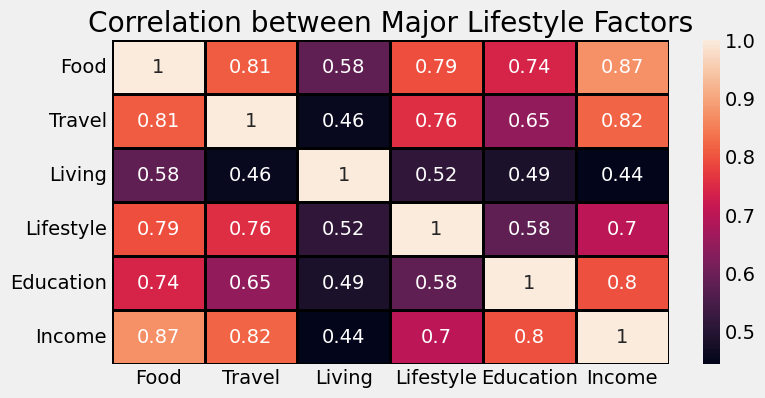

In [40]:
sns.heatmap(city[['Food', 'Travel','Living','Lifestyle','Education','Income']].corr(),
            annot=True,
            linecolor='black',
            linewidths=2
           )
plt.title('Correlation between Major Lifestyle Factors')
plt.show()

In [41]:
(city[(city.Country=='United Kingdom')|
     (city.Country=='Russia')|
     (city.Country=='China')|
     (city.Country=='Australia')|
     (city.Country=='Germany')]
     [['location','Food', 'Travel','Living','Lifestyle','Education','Income']]
     .set_index('location')
     .sort_values('Income',ascending=False)
     .style.background_gradient('Wistia')
)

,Food,Travel,Living,Lifestyle,Education,Income
location,,,,,,
"Brisbane, Australia",5,22,4644,39,4910,1517
"Sydney, Australia",5,29,5781,42,6661,1511
"Melbourne, Australia",4,21,5218,39,7062,1398
"London, United Kingdom",4,37,9069,42,11423,1380
"Adelaide, Australia",4,16,4309,34,4606,1329
"Munich, Germany",4,17,7445,44,5867,1315
"Frankfurt, Germany",3,22,6871,42,6502,1310
"Hamburg, Germany",3,21,5940,44,7085,1267
"Perth, Australia",4,20,4709,39,6358,1249


In [42]:
(city[(city.Country=='India')]
     [['location','Food', 'Travel','Living','Lifestyle','Education','Income']]
     .set_index('location')
     .sort_values('Income',ascending=False)
     .style.background_gradient('copper_r')
)

,Food,Travel,Living,Lifestyle,Education,Income
location,,,,,,
"Gurgaon, India",2,3,4089,22,1308,434
"Bangalore, India",2,3,4147,17,1281,294
"Noida, India",2,3,3711,19,1139,273
"Pune, India",2,3,4017,18,769,270
"Mumbai, India",2,1,4717,19,1067,249
"Delhi, India",2,3,3919,19,872,242
"Hyderabad, India",2,3,3917,16,888,225
"Chennai, India",2,3,4026,15,761,207
"Chandigarh, India",2,2,3880,19,896,195


In [43]:
x = city[city.Country=='India'][['City','Travel','Living','Lifestyle','Education','Income']]
x

,City,Travel,Living,Lifestyle,Education,Income
81,Chandigarh,2,3880,19,896,195
83,Noida,3,3711,19,1139,273
106,Ahmedabad,1,3753,16,635,157
110,Bangalore,3,4147,17,1281,294
112,Chennai,3,4026,15,761,207
114,Delhi,3,3919,19,872,242
115,Gurgaon,3,4089,22,1308,434
118,Hyderabad,3,3917,16,888,225
123,Kolkata,1,3638,16,582,166
127,Mumbai,1,4717,19,1067,249


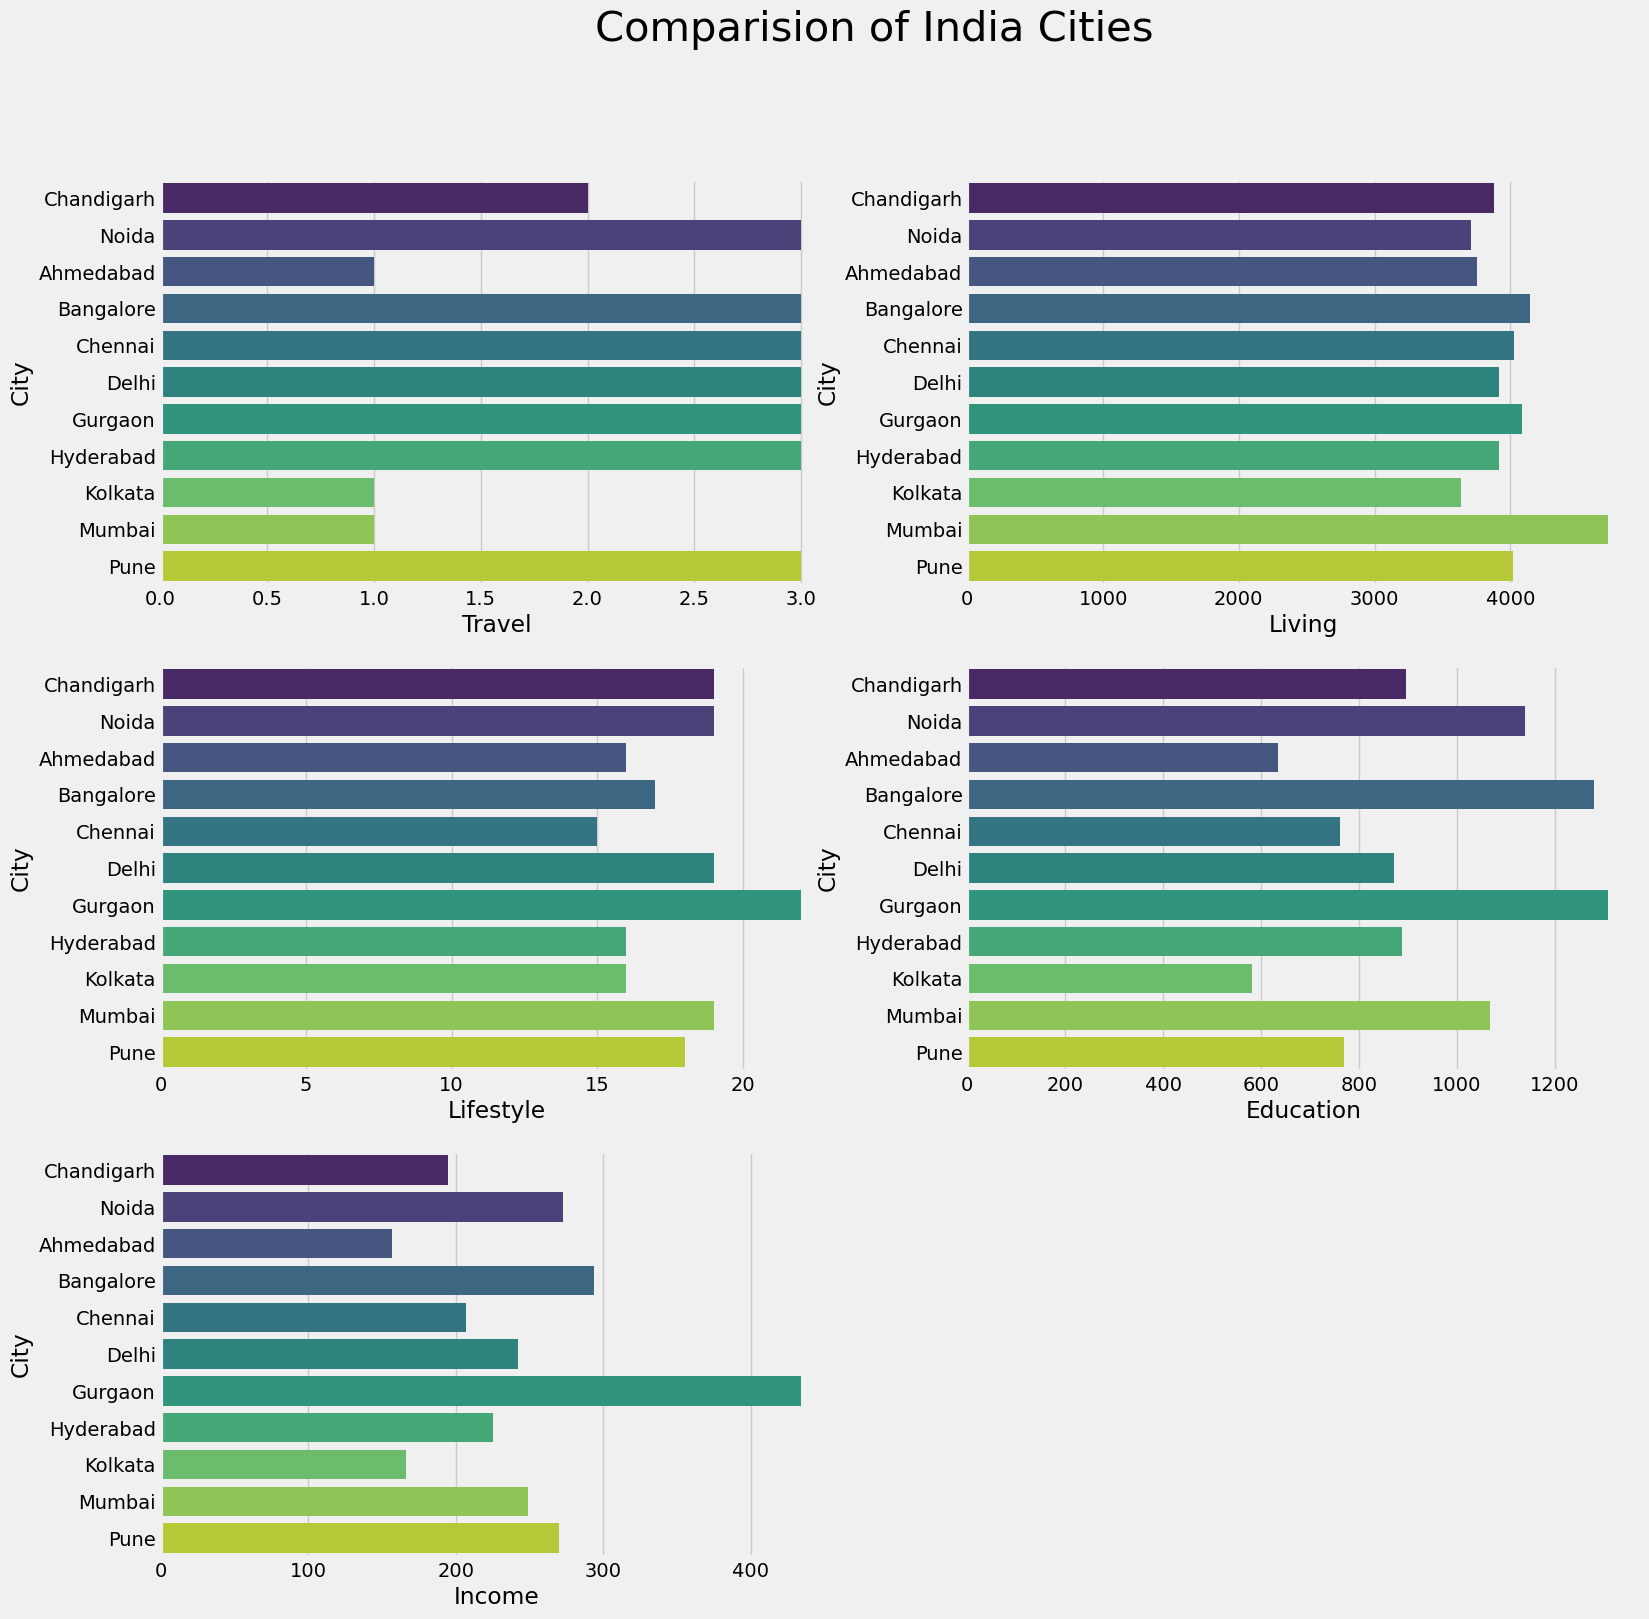

In [44]:
plt.figure(figsize=(17,17))
plt.subplot(3,2,1)
sns.barplot(y=x.City,x=x.Travel,palette='viridis')
plt.xlabel('Travel')

plt.subplot(3,2,2)
sns.barplot(y=x.City,x=x.Living,palette='viridis')
plt.xlabel('Living')

plt.subplot(3,2,3)
sns.barplot(y=x.City,x=x.Lifestyle,palette='viridis')
plt.xlabel('Lifestyle')

plt.subplot(3,2,4)
sns.barplot(y=x.City,x=x.Education,palette='viridis')
plt.xlabel('Education')

plt.subplot(3,2,5)
sns.barplot(y=x.City,x=x.Income,palette='viridis')
plt.xlabel('Income')

plt.suptitle('Comparision of India Cities',fontsize=30)
plt.show()

In [45]:
x = city[['Food', 'Travel','Living','Lifestyle','Education','Income']]
mm = MinMaxScaler()
data = pd.DataFrame(mm.fit_transform(x))
data.columns = x.columns
data.head()

,Food,Travel,Living,Lifestyle,Education,Income
0,0.142857,0.194444,0.139139,0.372549,0.139049,0.074890
1,0.142857,0.138889,0.161588,0.156863,0.177913,0.043424
2,0.142857,0.111111,0.155125,0.078431,0.121129,0.036816
3,0.428571,0.527778,0.252539,0.568627,0.032424,0.346759
4,0.142857,0.027778,0.082583,0.333333,0.057568,0.018250


In [46]:
data['Total Score'] = (data.Food+data.Travel+data.Lifestyle+data.Living+data.Education+data.Income)/6
data.head()

,Food,Travel,Living,Lifestyle,Education,Income,Total Score
0,0.142857,0.194444,0.139139,0.372549,0.139049,0.074890,0.177155
1,0.142857,0.138889,0.161588,0.156863,0.177913,0.043424,0.136922
2,0.142857,0.111111,0.155125,0.078431,0.121129,0.036816,0.107578
3,0.428571,0.527778,0.252539,0.568627,0.032424,0.346759,0.359450
4,0.142857,0.027778,0.082583,0.333333,0.057568,0.018250,0.110395


In [47]:
cities = city[['City','Country']]
cities

,City,Country
0,Saint Petersburg,Russia
1,Istanbul,Turkey
2,Izmir,Turkey
3,Helsinki,Finland
4,Chisinau,Moldova
5,Milan,Italy
6,Cairo,Egypt
7,Banja Luka,Bosnia And Herzegovina
8,Baku,Azerbaijan
9,Guadalajara,Mexico


In [48]:
data = pd.concat([data,cities],axis=1)
data.head()

,Food,Travel,Living,Lifestyle,Education,Income,Total Score,City,Country
0,0.142857,0.194444,0.139139,0.372549,0.139049,0.074890,0.177155,Saint Petersburg,Russia
1,0.142857,0.138889,0.161588,0.156863,0.177913,0.043424,0.136922,Istanbul,Turkey
2,0.142857,0.111111,0.155125,0.078431,0.121129,0.036816,0.107578,Izmir,Turkey
3,0.428571,0.527778,0.252539,0.568627,0.032424,0.346759,0.359450,Helsinki,Finland
4,0.142857,0.027778,0.082583,0.333333,0.057568,0.018250,0.110395,Chisinau,Moldova


### Top 10 Countries with Highest Total Score

In [49]:
display(data[['Country','City','Total Score']].sort_values('Total Score',ascending=False).head(10))

,Country,City,Total Score
144,Switzerland,Zurich,0.790375
78,NY,New York,0.670422
100,CA,San Francisco,0.660000
39,Singapore,Singapore,0.576437
70,United Kingdom,London,0.558841
128,Iceland,Reykjavik,0.557198
102,WA,Seattle,0.539670
50,Norway,Oslo,0.534259
47,MA,Boston,0.525962
71,CA,Los Angeles,0.487471


### Top 10 Countries with Lowest Total Score

In [50]:
display(data[['Country','City','Total Score']].sort_values('Total Score',ascending=True).head(10))

,Country,City,Total Score
123,India,Kolkata,0.042501
106,India,Ahmedabad,0.043629
112,India,Chennai,0.056045
63,Georgia,Tbilisi,0.057976
118,India,Hyderabad,0.060394
81,India,Chandigarh,0.063713
130,India,Pune,0.069141
82,Sri Lanka,Colombo,0.069626
114,India,Delhi,0.070959
127,India,Mumbai,0.071562


### Analyzing Cost of Essentials

In [51]:
x = city[['Country', 'City', 'Milk (regular), (1 liter)',
       'Loaf of Fresh White Bread (500g)', 'Eggs (regular) (12)',
       'Basic (Electricity, Heating, Cooling, Water, Garbage) for 85m2 Apartment',
       'Internet (60 Mbps or More, Unlimited Data, Cable/ADSL)',
       'Taxi 1km (Normal Tariff)']]
x = x.rename(columns={
    'Milk (regular), (1 liter)':'Milk',
    'Eggs (regular) (12)':'Eggs',
    'Loaf of Fresh White Bread (500g)':'Bread',
    'Basic (Electricity, Heating, Cooling, Water, Garbage) for 85m2 Apartment':'Electricity and Water',
    'Internet (60 Mbps or More, Unlimited Data, Cable/ADSL)':'Internet',
    'Taxi 1km (Normal Tariff)':'Taxi'
})

In [52]:
x.head()

,Country,City,Milk,Bread,Eggs,Electricity and Water,Internet,Taxi
0,Russia,Saint Petersburg,0.98,0.71,1.18,102.17,6.96,0.26
1,Turkey,Istanbul,0.71,0.36,1.62,59.33,14.2,0.47
2,Turkey,Izmir,0.65,0.38,1.51,51.07,12.89,0.57
3,Finland,Helsinki,0.96,2.27,2.02,82.66,22.31,1.0
4,Moldova,Chisinau,0.68,0.33,1.11,113.46,8.58,0.18


In [53]:
#Checking the 75th percentile of each column which can be represented as float
x.iloc[:,2:].astype('float').describe().loc['75%']

Milk                       1.1700
Bread                      1.6900
Eggs                       2.3525
Electricity and Water    145.7075
Internet                  43.3175
Taxi                       1.3500
Name: 75%, dtype: float64

In [54]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160 entries, 0 to 159
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Country                160 non-null    object
 1   City                   160 non-null    object
 2   Milk                   160 non-null    object
 3   Bread                  160 non-null    object
 4   Eggs                   160 non-null    object
 5   Electricity and Water  160 non-null    object
 6   Internet               160 non-null    object
 7   Taxi                   160 non-null    object
dtypes: object(8)
memory usage: 10.1+ KB


In [55]:
#Converting columns to float type
for col in x.columns[2:]:
    x[col] = x[col].astype('float')

In [56]:
#Checking 75th percentile of Milk column
x.Milk.describe().loc['75%']

1.17

### Display Top 5 Cities and their Coutries with High Cost of Essentials

In [57]:
# display(x[x.Milk>1.17][['Country','City','Milk']].sort_values('Milk',
#                         ascending=False).head(5).set_index('Country'))
# display(x[x.Bread>1.17][['Country','City','Bread']].sort_values('Bread',
#                         ascending=False).head(5).set_index('Country'))
# display(x[x.Eggs>1.17][['Country','City','Eggs']].sort_values('Eggs',
#                         ascending=False).head(5).set_index('Country'))
# display(x[x['Electricity and Water']>1.17][['Country','City','Electricity and Water']].sort_values('Electricity and Water',
#                         ascending=False).head(5).set_index('Country'))
# display(x[x.Internet>1.17][['Country','City','Internet']].sort_values('Internet',
#                         ascending=False).head(5).set_index('Country'))
# display(x[x.Taxi>1.17][['Country','City','Taxi']].sort_values('Taxi',
#                         ascending=False).head(5).set_index('Country'))

# The above code does the same thing as the below 1 line code, so instead of manually doing, automation has been done
[display(x[x[col]>x[col].describe().loc['75%']][['Country','City',col]]
         .sort_values(col,ascending=False)
         .head(5)
         .set_index('Country')) for col in x.columns[2:]]

,City,Milk
Country,,
Taiwan,Taipei,2.64
Hong Kong,Hong Kong,2.54
China,Shanghai,2.39
Singapore,Singapore,2.04
South Korea,Seoul,1.95


,City,Bread
Country,,
NY,New York,3.33
CA,San Diego,3.27
CA,San Francisco,3.12
CA,Los Angeles,2.99
Norway,Oslo,2.92


,City,Eggs
Country,,
Switzerland,Zurich,5.33
Iceland,Reykjavik,4.80
Norway,Oslo,3.79
France,Paris,3.40
Israel,Jerusalem,3.32


,City,Electricity and Water
Country,,
Germany,Frankfurt,265.52
Germany,Munich,242.66
Germany,Hamburg,232.62
Germany,Berlin,231.80
Slovenia,Ljubljana,199.61


,City,Internet
Country,,
United Arab Emirates,Abu Dhabi,93.29
United Arab Emirates,Dubai,90.42
Qatar,Doha,78.31
AZ,Phoenix,67.23
Costa Rica,San Jose,65.30


,City,Taxi
Country,,
Switzerland,Zurich,4.16
Japan,Tokyo,3.44
Netherlands,Eindhoven,3.00
United Kingdom,London,2.97
Dominican Republic,Santo Domingo,2.55


[None, None, None, None, None, None]

### Analysing Quality of Life

In [58]:
life = pd.read_csv('Dataset/movehubqualityoflife.csv')

In [59]:
life.head()

,City,Movehub Rating,Purchase Power,Health Care,Pollution,Quality of Life,Crime Rating
0,Caracas,65.18,11.25,44.44,83.45,8.61,85.70
1,Johannesburg,84.08,53.99,59.98,47.39,51.26,83.93
2,Fortaleza,80.17,52.28,45.46,66.32,36.68,78.65
3,Saint Louis,85.25,80.40,77.29,31.33,87.51,78.13
4,Mexico City,75.07,24.28,61.76,18.95,27.91,77.86


In [60]:
life.describe()

,Movehub Rating,Purchase Power,Health Care,Pollution,Quality of Life,Crime Rating
count,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000
mean,79.676713,46.477176,66.442824,45.240370,59.994537,41.338611
std,6.501011,20.614519,14.416412,25.369741,22.019376,16.416409
min,59.880000,6.380000,20.830000,0.000000,5.290000,9.110000
25%,75.070000,28.815000,59.420000,24.410000,42.752500,29.375000
50%,81.060000,49.220000,67.685000,37.210000,65.150000,41.140000
75%,84.020000,61.607500,77.207500,67.675000,78.617500,51.327500
max,100.000000,91.850000,95.960000,92.420000,97.910000,85.700000


#### Cities having Highest Quality of Life

In [61]:
(life[['City','Quality of Life']]
 .sort_values('Quality of Life',ascending=False)
 .head(10)
 .set_index('City')
 .style
 .background_gradient('Reds')
)

,Quality of Life
City,
Zurich,97.910000
Canberra,93.050000
Adelaide,91.540000
Berlin,91.170000
Aachen,90.520000
Stuttgart,90.400000
Dresden,90.210000
Munich,90.080000
Edmonton,89.580000


#### Cities having Lowest Quality of Life

In [62]:
(life[['City','Quality of Life']]
 .sort_values('Quality of Life',ascending=True)
 .head(10)
 .set_index('City')
 .style
 .background_gradient('Reds')
)

,Quality of Life
City,
Hanoi,5.290000
Caracas,8.610000
Manila,13.140000
Dhaka,13.480000
Tehran,14.330000
Nairobi,14.360000
Jakarta,15.660000
Baku,17.200000
Cairo,17.250000


#### Cities having Best Healthcare Facilities

In [63]:
(life[['City','Health Care']]
 .sort_values('Health Care',ascending=False)
 .head(10)
 .set_index('City')
 .style
 .background_gradient('Greens')
)

,Health Care
City,
Bangkok,95.960000
Canberra,91.900000
Pattaya,91.460000
Glasgow,90.550000
Taipei,88.890000
Brisbane,88.890000
Bristol,88.890000
Lyon,88.650000
Munich,88.430000


#### Cities having Worst Healthcare Facilities

In [64]:
(life[['City','Health Care']]
 .sort_values('Health Care',ascending=True)
 .head(10)
 .set_index('City')
 .style
 .background_gradient('Greens')
)

,Health Care
City,
Dhaka,20.830000
Hanoi,20.830000
Gaborone,27.780000
Baku,28.700000
Kolkata,31.290000
Indore,31.340000
Quito,32.410000
Belfast,33.330000
Kharkiv,35.060000


#### Cities having Highest Crime Rate

In [65]:
(life[['City','Crime Rating']]
 .sort_values('Crime Rating',ascending=False)
 .head(10)
 .set_index('City')
 .style
 .background_gradient('Purples')
)

,Crime Rating
City,
Caracas,85.700000
Johannesburg,83.930000
Fortaleza,78.650000
Saint Louis,78.130000
Mexico City,77.860000
Detroit,76.690000
Porto Alegre,76.460000
Noida,75.000000
Karachi,74.360000


#### Cities having Lowest Crime Rate

In [66]:
(life[['City','Crime Rating']]
 .sort_values('Crime Rating',ascending=True)
 .head(10)
 .set_index('City')
 .style
 .background_gradient('Purples')
)

,Crime Rating
City,
Malaga,9.110000
Marbella,9.110000
Abu Dhabi,10.860000
Tokyo,13.910000
Munich,15.340000
Aachen,15.340000
Dusseldorf,15.340000
Dresden,15.340000
Zurich,15.350000


### Suggest Better Places to Live

In [67]:
def recommend_better_cities(a,factor='Lifestyle'):
    x=city[['City','Food', 'Travel','Lifestyle','Education','Income']]
    food = x[x.City==a]['Food']
    travel = x[x.City==a]['Travel']
    life = x[x.City==a]['Lifestyle']
    edu = x[x.City==a]['Education']
    income = x[x.City==a]['Income']
    best_cities = x[(x.Food<=food.values[0]) & (x.Travel<=travel.values[0]) & 
                    (x.Lifestyle<=life.values[0]) & (x.Education<=edu.values[0]) & 
                    (x.Income<=income.values[0])]
    best = best_cities.sort_values(factor,ascending=False).head(10)
    return best.City.reset_index(drop=True)

In [68]:
recommend_better_cities('Sydney')

0    Frankfurt
1       Sydney
2        Amman
3     Auckland
4       Moscow
5    Eindhoven
6    Barcelona
7        Perth
8       Berlin
9       Ottawa
Name: City, dtype: object